Необходимо проанализировать данные по работе сервера

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import glob

In [2]:
# разархвируем данные
extract_dir = 'extract_dir'

with ZipFile('exmpl.zip') as zf:
    zf.extractall(extract_dir)

    for file in glob.glob(extract_dir + '/**', recursive=True):
        print(file)

extract_dir\
extract_dir\u_ex200328.log
extract_dir\u_ex200723.log
extract_dir\u_ex200724.log
extract_dir\u_ex200725.log
extract_dir\u_ex200726.log
extract_dir\u_ex200727.log
extract_dir\u_ex200728.log
extract_dir\u_ex200729.log
extract_dir\u_ex200730.log


In [3]:
# прочитаем построчно файлы и запишем их без первых строк
names = glob.glob(r'C:\Users\yurkina_yv\extract_dir/*.log', recursive=True)

for i in range(len(names)):
    with open (names[i],'r', encoding="latin-1") as df:
        lines = df.readlines()
    with open (names[i],'w', encoding="latin-1") as df:
        df.writelines(lines[3:])
    df.close()

In [4]:
# объединим файлы в один датафрейм
df_list = []

for i in range(len(names)):
    df = pd.read_table(names[i],sep = " ", encoding="latin-1")
    df_list.append(df)

# объединить все датафреймы
totaldata = pd.concat(df_list)

C:\Users\yurkina_yv\AppData\Local\Temp\ipykernel_8244\1482236557.py:5: DtypeWarning: Columns (6,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(names[i],sep = " ", encoding="latin-1")
C:\Users\yurkina_yv\AppData\Local\Temp\ipykernel_8244\1482236557.py:5: DtypeWarning: Columns (6,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(names[i],sep = " ", encoding="latin-1")
C:\Users\yurkina_yv\AppData\Local\Temp\ipykernel_8244\1482236557.py:5: DtypeWarning: Columns (6,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(names[i],sep = " ", encoding="latin-1")
C:\Users\yurkina_yv\AppData\Local\Temp\ipykernel_8244\1482236557.py:5: DtypeWarning: Columns (6,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(names[i],sep = " ", encoding="latin-1")
C:\Users\yur

In [5]:
totaldata.head()

,#Fields:,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,NaN
1,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,NaN
2,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,NaN
3,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,NaN
4,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,NaN


In [6]:
totaldata.shape

(3702258, 16)

Заголовки столбцов некорректно вывелись

In [7]:
# переименуем столбцы
totaldata = totaldata.rename(columns={'#Fields:':'_date', 
                                      'date':'_time', 
                                      'time':'s_ip',
                                      's-ip':'cs_method', 
                                      'cs-method':'cs_uri_stem',
                                      'cs-uri-stem':'cs_uri_query',
                                      'cs-uri-query':'s_port',
                                      's-port':'cs_username',
                                      'cs-username':'c_ip',
                                      'c-ip':'cs_User_Agent',
                                      'cs(User-Agent)':'cs_Referer',
                                      'cs(Referer)':'sc_status',
                                      'sc-status':'sc_substatus',
                                      'sc-substatus':'sc_win32_status',
                                      'sc-win32-status':'time_taken',
                                      'time-taken':'del'}).drop(columns='del')

In [8]:
totaldata.head()

,_date,_time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs_User_Agent,cs_Referer,sc_status,sc_substatus,sc_win32_status,time_taken
0,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31
1,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31
2,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15
3,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31
4,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62


s-	Серверные действия<br />
c-	Клиентские действия<br />
cs-	Действия «клиент-сервер»<br />
sc-	Действия «сервер-клиент»<br />

Дата	date	Дата возникновения события.<br />
Время	time	Время возникновения события.<br />
Адрес IP сервера	s-ip	IP-адрес сервера, на котором была создана запись журнала.<br />
Метод	cs-method	Действие, которое пытался выполнить клиент (например, метод GET).<br />
Ресурс URI	cs-uri-stem	Ресурс, к которому было выполнено обращение, например Default.htm.<br />
Запрос URI	cs-uri-query	Запрос, который пытался выполнить клиент.<br />
Порт сервера	s-port	Номер порта, к которому подключен клиент.<br />
IP-адрес клиента	c-ip	IP-адрес клиента, получившего доступ к серверу.<br />
Агент пользователя	cs(User-Agent)	Обозреватель, используемый клиентом.<br />
Источник ссылки	cs(Referer)	Предыдущий просмотренный пользователем узел. На этом узле содержалась ссылка на данный узел.<br />
Состояние протокола	sc-status	Состояние действия (в терминах HTTP).<br />
Состояние Win32	sc-win32-status	Состояние действия (в терминах Windows 2000).<br />
Заняло времени	time-taken	Время, которое заняло выполнение действия.<br />
Имя пользователя	c-username	Имя пользователя, получившего доступ к серверу. Это не относится к анонимным пользователям, которые обозначаются черточками.<br />

In [9]:
#посмотрим на данные
print(totaldata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702258 entries, 0 to 169462
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   _date            object
 1   _time            object
 2   s_ip             object
 3   cs_method        object
 4   cs_uri_stem      object
 5   cs_uri_query     object
 6   s_port           object
 7   cs_username      object
 8   c_ip             object
 9   cs_User_Agent    object
 10  cs_Referer       object
 11  sc_status        object
 12  sc_substatus     object
 13  sc_win32_status  object
 14  time_taken       object
dtypes: object(15)
memory usage: 451.9+ MB
None


In [10]:
totaldata.isnull().sum() #есть пропущенные значения

_date               0
_time               0
s_ip               11
cs_method          22
cs_uri_stem        22
cs_uri_query       22
s_port             33
cs_username        33
c_ip               33
cs_User_Agent      33
cs_Referer         33
sc_status          33
sc_substatus       33
sc_win32_status    33
time_taken         33
dtype: int64

In [11]:
# посмотрим на IP-адрес сервера, куда сохраняются записи журнала
totaldata.s_ip.value_counts().head(10)

192.168.254.71    3702214
Internet               11
time                   11
23:00:00                2
13:26:39                1
23:00:02                1
11:51:08                1
23:00:01                1
11:42:10                1
11:43:37                1
Name: s_ip, dtype: int64

Видим, что данные неправильно считались и есть ошибки

In [12]:
totaldata.query('s_ip == "Internet"')

,_date,_time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs_User_Agent,cs_Referer,sc_status,sc_substatus,sc_win32_status,time_taken
2544456,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71945,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128006,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76216,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111380,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108414,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63239,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63288,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141414,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55424,#Software:,Microsoft,Internet,Information,Services,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# оставим только с ip-адресом
totaldata = totaldata.query('s_ip == "192.168.254.71"')

In [14]:
totaldata.shape

(3702214, 15)

In [15]:
# изменим формат данных
totaldata._date = pd.to_datetime(totaldata._date)
totaldata.cs_uri_stem = totaldata.cs_uri_stem.astype(str)

In [16]:
totaldata.isnull().sum()

_date              0
_time              0
s_ip               0
cs_method          0
cs_uri_stem        0
cs_uri_query       0
s_port             0
cs_username        0
c_ip               0
cs_User_Agent      0
cs_Referer         0
sc_status          0
sc_substatus       0
sc_win32_status    0
time_taken         0
dtype: int64

In [17]:
totaldata.duplicated()

0         False
1          True
2         False
3          True
4         False
          ...  
169458    False
169459    False
169460    False
169461    False
169462    False
Length: 3702214, dtype: bool

Пропущенных и дублей нет. Посмотрим на даты запросов.

In [18]:
totaldata._date.value_counts().head(10)

2020-03-28    2608910
2020-07-30     169459
2020-07-29     168197
2020-07-28     143514
2020-07-24     137997
2020-07-23     129684
2020-07-27     120503
2020-07-25     113430
2020-07-26     110520
Name: _date, dtype: int64

Text(0.5, 1.0, 'Распределение запросов по датам')

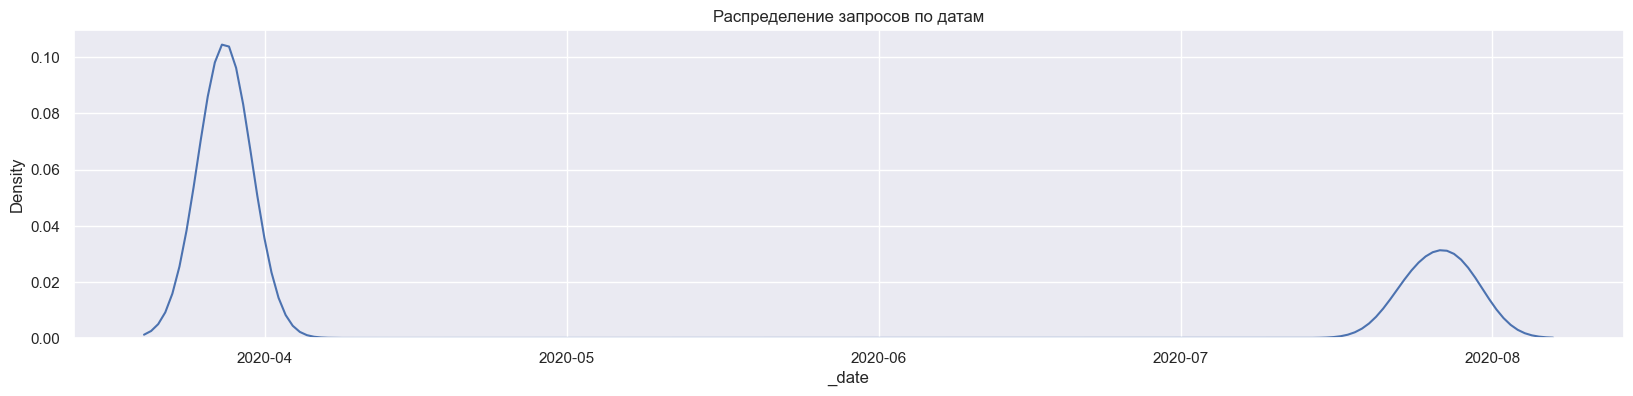

In [19]:
sns.set(rc={'figure.figsize': (20, 4)})
sns.kdeplot(data=totaldata, x="_date")\
    .set_title("Распределение запросов по датам")

График подтверждает, что 28 марта было много записей в журнале, в июле - меньше. Срваним кол-во по месяцам.

In [20]:
# создадим колонку с месяцем
totaldata['month'] = totaldata['_date'].dt.month_name()

In [21]:
totaldata.head()

,_date,_time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs_User_Agent,cs_Referer,sc_status,sc_substatus,sc_win32_status,time_taken,month
0,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March
1,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March
2,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,March
3,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March
4,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,March


In [22]:
totaldata.groupby('month').agg({'s_ip':'count'}).sort_values('s_ip', ascending = False)

,s_ip
month,
March,2608910
July,1093304


В датасете данные только за март (28 марта) и июль (с 23 по 30), но количество запросов 28 марта всё равно превышает запросы за несколько дней в июле

In [23]:
# посмотрим на cs_method
totaldata.cs_method.value_counts().head()

POST      3653204
GET         48910
DELETE         81
HEAD           19
Name: cs_method, dtype: int64

In [24]:
df = totaldata.groupby(['month', 'cs_method'],as_index=False).agg({'s_ip':'count'}).sort_values('s_ip', ascending = False)

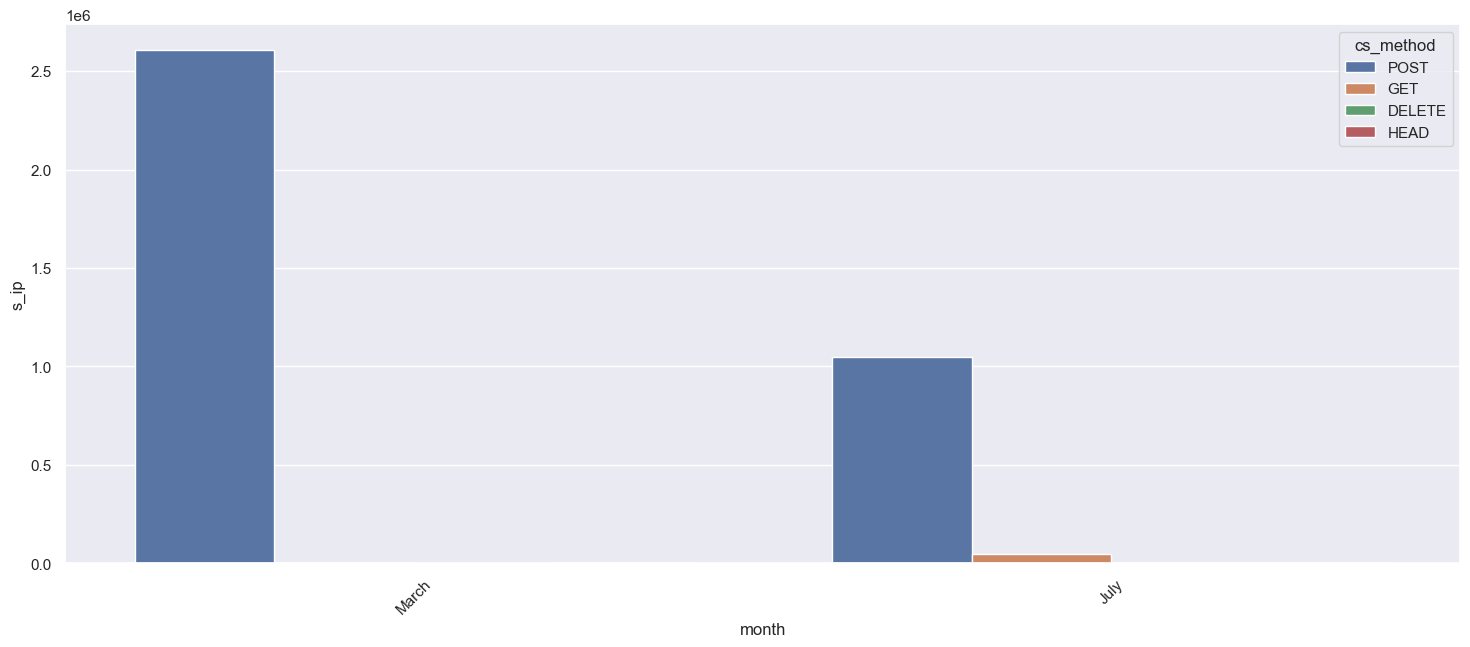

In [25]:
sns.set(rc={'figure.figsize': (18, 7)})
sns.barplot(data=df, x="month", y='s_ip', hue="cs_method")
plt.xticks(rotation=45)
plt.show()

Получается, что были в основном post, get - появились только в июле

Посмотрим, кто получатели

In [26]:
totaldata.c_ip.value_counts()

172.19.251.17      1993773
192.168.10.61      1647904
192.168.254.40       20598
192.168.254.108       5777
192.168.254.105       5510
192.168.254.109       4922
192.168.254.107       4906
192.168.254.103       4093
192.168.254.102       3649
192.168.254.104       2756
192.168.254.127       2199
192.168.254.101       2041
192.168.253.5         1897
192.168.254.110       1435
172.19.25.73           181
192.168.254.153        130
192.168.254.189         84
172.19.25.15            81
192.168.254.120         63
192.168.254.100         48
172.19.25.20            46
172.19.25.71            40
172.19.180.135          32
172.19.180.132          28
10.11.9.146             21
Name: c_ip, dtype: int64

Основные ip-адреса - 172.19.251.17, 192.168.10.61. Сгруппируем по месяцам и посчитаем сохраненные в журнале записи по каждому ip

In [27]:
totaldata.groupby(['c_ip', 'month'],as_index=False).agg({'s_ip':'count'}).sort_values(by=['month','s_ip'], ascending = False)

,c_ip,month,s_ip
8,172.19.251.17,March,1475741
10,192.168.10.61,March,1130840
29,192.168.254.40,March,2304
26,192.168.254.153,March,22
12,192.168.253.5,March,3
7,172.19.251.17,July,518032
9,192.168.10.61,July,517064
28,192.168.254.40,July,18294
20,192.168.254.108,July,5777
18,192.168.254.105,July,5510


Получается, что и в марте и в июле одни и те же активные ip. Посмотрим на них в разрезе cs_method

In [28]:
totaldata.query('c_ip == ["172.19.251.17","192.168.10.61"]')\
    .groupby(['c_ip', 'cs_method'],as_index=False)\
    .agg({'s_ip':'count'})\
    .sort_values(by=['cs_method','s_ip'], ascending = False)

,c_ip,cs_method,s_ip
2,172.19.251.17,POST,1992764
4,192.168.10.61,POST,1647768
1,172.19.251.17,HEAD,18
0,172.19.251.17,GET,991
3,192.168.10.61,GET,136


В основном это были POST запросы. Проанализируем GET

In [29]:
totaldata.query('cs_method == "GET"')\
    .groupby(['c_ip'],as_index=False)\
    .agg({'s_ip':'count'})\
    .sort_values('s_ip', ascending = False)

,c_ip,s_ip
24,192.168.254.40,20598
16,192.168.254.107,3454
17,192.168.254.108,3380
15,192.168.254.105,3336
18,192.168.254.109,3054
12,192.168.254.102,2679
13,192.168.254.103,2438
21,192.168.254.127,2027
9,192.168.253.5,1897
11,192.168.254.101,1593


Далее нужно будет подробнее остановиться на 192.168.254.40, тк именно с него было большинство GET запросов

Кроме того, нас может интересовать время, затраченное на выполнение запроса

In [30]:
totaldata.time_taken = totaldata.time_taken.astype(int)

In [31]:
df = totaldata.groupby('_date', as_index = False).agg({'time_taken':'mean'}).sort_values('time_taken', ascending = False)
df

,_date,time_taken
2,2020-07-24,444.904527
1,2020-07-23,196.615319
3,2020-07-25,177.611734
5,2020-07-27,131.065990
8,2020-07-30,119.801338
6,2020-07-28,109.010278
7,2020-07-29,91.676237
4,2020-07-26,79.143612
0,2020-03-28,55.320313


In [32]:
df._date = pd.to_datetime(df._date,format='%Y-%m-%dT')

Text(0.5, 1.0, 'Среднее время на запрос')

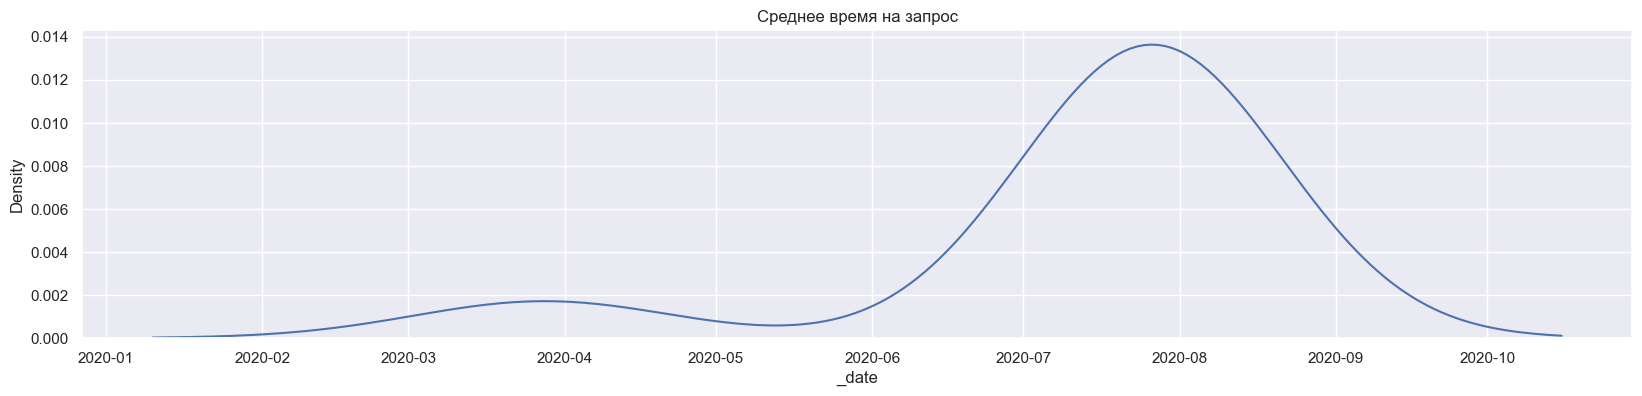

In [33]:
sns.set(rc={'figure.figsize': (20, 4)})
sns.kdeplot(data=df, x="_date")\
    .set_title("Среднее время на запрос")

Получается, что среднее время выполнения запроса в июне увеличилось, и пик пришелся на 24 июля. Проверим, какие запросы выполнялись в этот день

In [34]:
totaldata.query('_date == "2020-07-24"')\
            .groupby('cs_uri_query')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,time_taken
cs_uri_query,
nodeChangeLog=Directum&24.07.2020%2004:03:33,284524.500000
nodeChangeLog=Directum&24.07.2020%2004:07:24,284368.000000
nodeChangeLog=Directum&24.07.2020%2004:09:36,280669.000000
nodeChangeLog=Directum&24.07.2020%2006:03:33,70809.000000
vid=%D0%97%D0%B0%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%9E%D1%82%D0%BF%D1%83%D1%81%D0%BA&GUID=%D0%97%D0%B0%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%9E%D1%82%D0%BF%D1%83%D1%81%D0%BA:53990dbd-cd80-11ea-b44b-0050569e5165&type=HTML4,45876.200000
vid=%D0%97%D0%B0%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%9E%D1%82%D0%BF%D1%83%D1%81%D0%BA,31648.545455
nodeChangeLog=Directum&24.07.2020%2007:22:29,30851.500000
nodeChangeLog=Directum&24.07.2020%2008:03:32,30838.500000
nodeChangeLog=Directum&24.07.2020%2007:33:33,30504.000000


В топе - nodeChangeLog=Directum. Проверим, какие с каких UserAgent

In [35]:
totaldata.query('_date == "2020-07-24"')\
            .groupby('cs_User_Agent')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,time_taken
cs_User_Agent,
Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:78.0)+Gecko/20100101+Firefox/78.0,15434.384615
"Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/84.0.4147.89+Safari/537.36",5726.769231
"Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/49.0.2623.112+Safari/537.36",2534.333333
1C+Enterprise/8.3,1668.148936
Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+6.1;+WOW64;+Trident/5.0;+SLCC2;+.NET+CLR+2.0.50727;+.NET4.0E;+.NET+CLR+3.5.30729;+.NET+CLR+3.0.30729;+.NET4.0C;+InfoPath.3),1274.083000
-,518.459783
Mozilla/5.0+(Windows;+U;+Windows+NT+6.0;en-US;+rv:1.9.2)+Gecko/20100115+Firefox/3.6),422.666667
"Mozilla/5.0+(Windows+NT+10.0;+WOW64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/52.0.2743.116+Safari/537.36",414.000000
"Mozilla/5.0+(Windows+NT+10.0;+WOW64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/51.0.2704.103+Safari/537.36",234.000000


Наиболее "тормознутым" выглядит Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:78.0)+Gecko/20100101+Firefox/78.0	

Проверим теперь ресурсы, к которым было выполнено обращение

In [36]:
totaldata.query('_date == "2020-07-24"')\
            .groupby('cs_uri_stem')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,time_taken
cs_uri_stem,
/dev-info_kiosk/hs/sda/service/zayavlen,34273.142857
/copy_askona_kz_ut/hs/kzbt/docs,32189.700000
/dev-info_kiosk/hs/sda/service/getBlank,32062.909091
/dev-info_kiosk/hs/sda/getTalon,11804.000000
/dev-info_kiosk/hs/sda/getZayavlen,7951.923077
/1c_askona_wms_2/ru_RU/e1cib/login,6282.000000
/1c_buh_corp_demo/ru_RU/e1cib/login,6245.000000
/1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws,5943.605339
/erp_pmt_repl_signer4/hs/dadir/getEmployees,5321.494792


Предположу, последнее слово описывает название, поэтому получается, что среднее время выше у запросов на заявления, документы и бланки. Посмотрим на эти данные без фильтра даты.

In [37]:
totaldata.groupby('cs_uri_stem')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,time_taken
cs_uri_stem,
/dev-info_kiosk/hs/sda/getInquiry,78136.000000
/dev-infokiosk/hs/sda/getZayavlen,73848.400000
/dev-info_kiosk/hs/sda/arhiv2NDFL,44596.125000
/dev-info_kiosk/hs/sda/getZayavlen,39477.913043
/copy_erp_pmt_repl_signer4_12-11-19_153722/e1cib/cmi/cmiStartData,37354.500000
/dev-info_kiosk/hs/sda/arhivRef182,35710.500000
/dev-info_kiosk/hs/sda/service/zayavlen,34273.142857
/dev-info_kiosk/hs/sda/service/getBlank,32062.909091
/copy_erp_pmt_repl_signer4_12-11-19_153722/ru_RU/e1csys/ecscore/ringout.wav,20071.000000


К заявлениям прибавились запросы getInquiry, а также 2NDFL и другие. 

Предположу, что dev-info_kiosk - это некий сервис для сотрудников, который отправляет запросы на 1С для получения и\или отправки документов, заявлений и т.д. Возможно, этот сервис был внедрен только в июле. Проверим это

In [38]:
kiosk = totaldata[totaldata['cs_uri_stem'].str.contains('dev-info')]
kiosk

,_date,_time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs_User_Agent,cs_Referer,sc_status,sc_substatus,sc_win32_status,time_taken,month
19889,2020-07-23,05:42:49,192.168.254.71,GET,/dev-info_kiosk/hs/sda/getEnums,listEnums=%D0%9F%D1%80%D0%B8%D1%87%D0%B8%D0%BD...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,200,0,0,6718,July
19920,2020-07-23,05:43:58,192.168.254.71,GET,/dev-info_kiosk/hs/sda/getEnums,listEnums=%D0%92%D0%B8%D0%B4%D1%8B%D0%9E%D1%82...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,200,0,0,187,July
19963,2020-07-23,05:45:30,192.168.254.71,GET,/dev-info_kiosk/hs/sda/getEnums,listEnums=%D0%92%D0%B8%D0%B4%D1%8B%D0%9E%D1%82...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,200,0,0,6055,July
22168,2020-07-23,06:26:57,192.168.254.71,GET,/dev-info_kiosk/hs/sda/getInquiry,%D0%A1%D0%BE%D1%82%D1%80%D1%83%D0%B4%D0%BD%D0%...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,200,0,0,78136,July
22175,2020-07-23,06:27:16,192.168.254.71,GET,/dev-info_kiosk/hs/sda/service/inquiry,-,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,500,0,0,4596,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42433,2020-07-30,07:10:02,192.168.254.71,GET,/dev-infokiosk/hs/sda/getZayavlen,vid=%D0%A1%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,500,0,0,30616,July
45748,2020-07-30,07:34:19,192.168.254.71,GET,/dev-infokiosk/hs/sda/getZayavlen,vid=%D0%A1%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,200,0,0,5047,July
46132,2020-07-30,07:37:36,192.168.254.71,GET,/dev-infokiosk/hs/sda/getZayavlen,vid=%D0%A1%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,401,5,0,250,July
58507,2020-07-30,08:13:47,192.168.254.71,GET,/dev-infokiosk/hs/sda/service/zayavlen,vid=%D0%A1%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0...,443,-,172.19.25.73,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:7...,-,500,0,0,1656,July


In [39]:
kiosk.groupby(['cs_uri_stem', 'month'])\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,,time_taken
cs_uri_stem,month,
/dev-info_kiosk/hs/sda/getInquiry,July,78136.000000
/dev-infokiosk/hs/sda/getZayavlen,July,73848.400000
/dev-info_kiosk/hs/sda/arhiv2NDFL,July,44596.125000
/dev-info_kiosk/hs/sda/getZayavlen,July,39477.913043
/dev-info_kiosk/hs/sda/arhivRef182,July,35710.500000
/dev-info_kiosk/hs/sda/service/zayavlen,July,34273.142857
/dev-info_kiosk/hs/sda/service/getBlank,July,32062.909091
/dev-info_kiosk/hs/sda/service/ref182,July,12847.000000
/dev-info_kiosk/hs/sda/getTalon,July,11708.666667


Так и есть - dev info kiosk появился только в июле. И при этом действием было GET - запросы с сервера. Дополнительно проверим.

In [40]:
totaldata.groupby('cs_method')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

,time_taken
cs_method,
GET,380.547577
HEAD,182.526316
POST,84.488336
DELETE,34.246914


Ранее мы видели, что в марте был только POST, а в июле появился GET. При этом времени на GET затрачивается больше.

Вернемся к анализу s_ip 192.168.254.40

In [41]:
totaldata.query('c_ip == "192.168.254.40" and cs_method == "GET"')\
            .groupby('cs_uri_stem')\
            .agg({'time_taken':'mean'})\
            .sort_values(by=['time_taken'], ascending = False)

,time_taken
cs_uri_stem,
/erp_pmt_repl_signer4/hs/dadir/getEmployees,1088.260995
/erp_pmt_repl_signer3/hs/dadir/getOrgs,692.678468
/erp_pmt_repl_signer4/hs/dadir/getOrgs,659.065041
/erp_pmt_repl_signer3/hs/dadir/getEmployees,612.215278
/erp_pmt_repl_signer2/hs/dadir/getEmployees,253.200810
/erp_pmt_repl_signer2/hs/dadir/getOrgs,231.621370
/erp_pmt_repl_signer1/hs/dadir/getEmployees,207.445602
/erp_pmt_repl_signer1/hs/dadir/getOrgs,200.042824
/erp_pmt_repl_signer2/hs/dadir/ChangeRegistrationOfTable,36.393939


In [42]:
totaldata.query('c_ip == "192.168.254.40" and cs_method == "GET"')\
            .groupby('cs_User_Agent')\
            .agg({'time_taken':'mean'})\
            .sort_values(by=['time_taken'], ascending = False)

,time_taken
cs_User_Agent,
Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+6.1;+WOW64;+Trident/5.0;+SLCC2;+.NET+CLR+2.0.50727;+.NET4.0E;+.NET+CLR+3.5.30729;+.NET+CLR+3.0.30729;+.NET4.0C;+InfoPath.3),338.738712


Анализ показал, что с ip 192.168.254.40 запросы выполняются только с одного UserAgent в основном к getEmployees (видимо, получить какие-то данные о сотрудниках)

Проверим sc_status

In [43]:
totaldata.sc_status.value_counts().head()

200    3408613
200     259668
500      17151
401       6735
500       4800
Name: sc_status, dtype: int64

1xx (сведения): предварительный ответ — запрос получен, процесс продолжается.
2xx (успешно): сервер успешно получил и принял запрос.
3xx (перенаправление): для выполнения запроса необходимо выполнить дальнейшие действия.
4xx (ошибка клиента): запрос содержит ошибку и не может быть выполнен.
5xx (ошибка сервера): серверу не удалось выполнить запрос.

In [44]:
totaldata.sc_status.dtypes

dtype('O')

In [45]:
totaldata.sc_status = totaldata.sc_status.astype(int)

In [46]:
# сгруппируем по типу ответа
labels = ['1xx', '2xx', '3xx', '4xx', '5xx']
bins = [0, 199, 299, 399, 499, 599]

totaldata = totaldata.assign(code_group=pd.cut(totaldata['sc_status'], bins=bins, labels=labels))
totaldata.head()

,_date,_time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs_User_Agent,cs_Referer,sc_status,sc_substatus,sc_win32_status,time_taken,month,code_group
0,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March,2xx
1,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March,2xx
2,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,March,2xx
3,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,March,2xx
4,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,March,2xx


In [47]:
code = totaldata.groupby("code_group").agg({'s_ip':'count'})
code

,s_ip
code_group,
1xx,0
2xx,3668606
3xx,56
4xx,10569
5xx,22983


In [48]:
(code.groupby("code_group")["s_ip"].sum() / code.s_ip.sum())*100

code_group
1xx     0.000000
2xx    99.092219
3xx     0.001513
4xx     0.285478
5xx     0.620791
Name: s_ip, dtype: float64

Соответственно 99% запросов выполнились успешно, ошибки составили около 1%. Проанализируем запросы с ошибками.

In [49]:
totaldata.query('code_group == ["4хх","5xx"]')\
            .groupby('cs_method')\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head()

,time_taken
cs_method,
GET,30006.077844
POST,534.194425


Получается, что ошибки были как get, так и с post запросами, и среднее время выполнения существенно выше для get.

In [50]:
# Посмотрим детально по cs_uri_stem

totaldata.query('code_group == ["4хх","5xx"]')\
            .groupby(by=['month','cs_method','cs_uri_stem', 'c_ip'])\
            .agg({'s_ip':'count'})\
            .sort_values('s_ip', ascending = False)\
            .head(10)

s_ip
month cs_method cs_uri_stem                                     c_ip                  
July  POST      /1c_askona_wms_2/ws/galESBExchange.1cws         192.168.10.61    13626
                /1c_askona_wms_msk-1/ws/galESBExchange.1cws     172.19.251.17     7407
March POST      /1c_askona_wms_2/ws/galESBExchange.1cws         192.168.10.61     1224
July  POST      /1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws 172.19.251.17      206
                /1c-ask-wms-obuhovo-test/ru_RU/e1cib/history    172.19.251.17      162
March POST      /1c_askona_wms_msk-1/ws/galESBExchange.1cws     172.19.251.17      112
July  POST      /copy_askona_kz_ut/hs/kzbt/partners             192.168.254.189     31
      GET       /erp_pmt_repl_signer4/hs/dadir/getOrgs          192.168.254.40      24
                /erp_pmt_repl_signer4/hs/dadir/getEmployees     192.168.254.40      24
                /erp_pmt_repl_signer3/hs/dadir/getEmployees     192.168.254.40      22

In [51]:
# Посмотрим детально по cs_User_Agent

totaldata.query('code_group == ["4хх","5xx"]')\
            .groupby(by=['month','cs_method','cs_User_Agent', 'c_ip'])\
            .agg({'s_ip':'count'})\
            .sort_values('s_ip', ascending = False)\
            .head(10)

s_ip
month cs_method cs_User_Agent                                      c_ip                  
July  POST      -                                                  192.168.10.61    13634
                                                                   172.19.251.17     7613
March POST      -                                                  192.168.10.61     1224
July  POST      Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Apple... 172.19.251.17      170
      GET       Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+6... 192.168.254.40     113
March POST      -                                                  172.19.251.17      112
July  POST      -                                                  192.168.254.189     31
      GET       Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:78... 172.19.25.73        23
                1C+Enterprise/8.3                                  192.168.254.127     15
      POST      Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+6... 192.168.254.105     11

In [52]:
totaldata.query('code_group == ["4хх","5xx"]')\
            .groupby(by=['month','cs_method','cs_User_Agent', 'c_ip'])\
            .agg({'time_taken':'mean'})\
            .sort_values('time_taken', ascending = False)\
            .head(10)

time_taken
month cs_method cs_User_Agent                                      c_ip                          
July  GET       Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Apple... 172.19.25.15     218826.500000
                Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:79... 172.19.25.73     135028.000000
                Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:78... 172.19.25.73      69072.739130
                Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+AppleW... 172.19.25.20      68673.000000
                1C+Enterprise/8.3                                  192.168.254.100   29652.000000
                Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+6... 192.168.254.40    17924.212389
                1C+Enterprise/8.3                                  192.168.254.127   14333.466667
                Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Apple... 172.19.251.17     10236.000000
      POST      -                                                  192.168.254.189   10077.032258
                1C+Enterprise/8.3                                  192.168.254.100    4845.500000

Количество записей для запросов с ошибками в июле существенно выше для /1c_askona_wms_2/ws/galESBExchange.1cws (вероятно, обмен данными). В UserAgent стоит -, с часто используемых ip-адресов - 172.19.251.17, 192.168.10.61 (предположу, что это ip компании). 

Однако, среднее время выполнения запроса значительно выше с адресов 172.19.25.15, 172.19.25.73 для get запросов.

### Вывод

Датасет содержит данные за март и июль. В результате анализа мы получили следующие результаты:
    - количество запросов в марте (за 1 день) выше, чем в июле, 
    - Основные c-ip-адреса - 172.19.251.17, 192.168.10.61
    - среднее время выполнения запроса существенно увеличилось в июле, пик пришелся на 24 июля, когда выполнялись запросы с Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64;+rv:78.0)+Gecko/20100101+Firefox/78.0 на заявления, документы и бланки (вероятно сервер был перегружен)
    -  c c_ip 192.168.254.40 было больше всего get запросов, выполняются только с одного UserAgent в основном к getEmployees (видимо, получить какие-то данные о сотрудниках)
    - ошибки составляют чуть менее 1%, при этом в основном относятся к get запросам
   
   Для более детального анализа надо знать задачу, чтобы понять куда дальше копать.